<a href="https://colab.research.google.com/github/JEEVITHKUMAR14/Eye-Detection-Analysis/blob/main/Eye_Detection_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install snowflake-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 2.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pyopenssl to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 135.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
  Attempting uninstall: pyOpenSSL
    Foun

In [ ]:
import pandas as pd
import snowflake.connector

conn=snowflake.connector.connect(
    user='Jeevith14',
    password='Jeevithkumar1495',
    account='UZPCHFA-UE46518',
    database='Eye',
    schem='PUBLIC',
    warehouse='COMPUTE_WH',
)


In [ ]:
query = 'SELECT * FROM "EYE"'
df=pd.read_sql(query,conn)

conn.close()

print(df.head())

/tmp/ipython-input-946717707.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  EYEDETECTION  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0  


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [ ]:
x=df.drop('EYEDETECTION',axis=1)
y=df['EYEDETECTION']

In [ ]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
x=norm.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9712950600801068


NAVIE BASE

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x=df.drop('EYEDETECTION',axis=1)
y=df['EYEDETECTION']

In [ ]:
std=StandardScaler()
x=std.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.4679572763684913


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
x=df.drop('EYEDETECTION',axis=1)
y=df['EYEDETECTION']

In [ ]:
st=StandardScaler()
x=st.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.571762349799733


COMPARSION ACCURACY

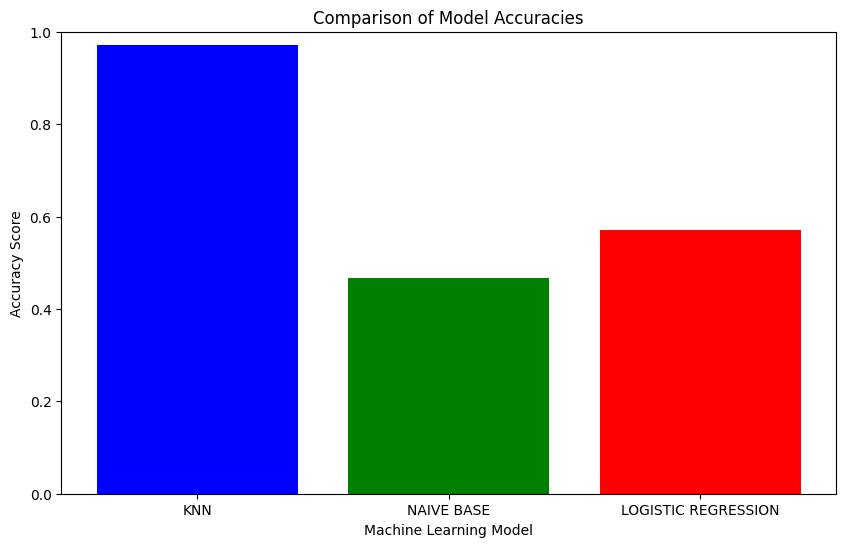

In [ ]:
import matplotlib.pyplot as plt

knn_accuracy = 0.9712950600801068
naive_bayes_accuracy = 0.4679572763684913
logistic_regression_accuracy = 0.571762349799733

x_axis=['KNN', 'NAIVE BASE', 'LOGISTIC REGRESSION']
y_axis=[knn_accuracy, naive_bayes_accuracy, logistic_regression_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis, color=['blue', 'green', 'red'])
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()